# 상권정보 분석

## 라이브러리 로드

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 한글폰트 설정

In [2]:
plt.rc("font",family="Malgun Gothic")
plt.rc("axes",unicode_minus="False") #-표기 가능하게

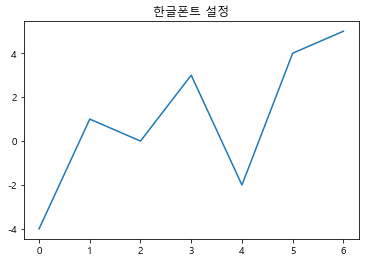

In [3]:
pd.Series([-4,1,0,3,-2,4,5]).plot(title="한글폰트 설정")

## 파일로드

In [4]:
df = pd.read_csv("C:\\Users\\user7\\Desktop\\data\\상가상권정보\\상가업소정보_201912_01.csv",sep="|")
df.shape

(573680, 39)

In [5]:
#모든 칼럼이 표시되도록 설정
pd.options.display.max_columns=39

In [6]:
df.head(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,기타 주점업,11,서울특별시,11680,강남구,1168060000,대치1동,1168010600,대치동,1168010600206040000,1,대지,604,NaN,서울특별시 강남구 대치동 604,116802000003,서울특별시 강남구 남부순환로,2933,NaN,1168010600106040000014378,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,NaN,1,NaN,127.061026,37.493922


In [7]:
df.tail(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
573679,16335150,마이리틀네일,NaN,F,생활서비스,F01,이/미용/건강,F01A02,발/네일케어,S96119,기타미용업,11,서울특별시,11320,도봉구,1132051100,창1동,1132010700,창동,1132010700208120000,1,대지,812,NaN,서울특별시 도봉구 창동 812,113204127109,서울특별시 도봉구 도봉로114길,22,8.0,1132010700108120000018489,현대타운아파트,서울특별시 도봉구 도봉로114길 22-8,132691,1455.0,101,NaN,NaN,127.035145,37.647099


## 결측치 확인

In [8]:
True == 1
n=df.isnull().sum()
n

상가업소번호            0
상호명               1
지점명          497006
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      34390
표준산업분류명       34390
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         98756
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        501692
건물관리번호            0
건물명          308072
도로명주소             0
구우편번호             0
신우편번호             9
동정보          522824
층정보          226553
호정보          488414
경도                0
위도                0
dtype: int64

In [9]:
## 결측치 시각화 라이브러리 conda prompt 에서 설치
import missingno as msno

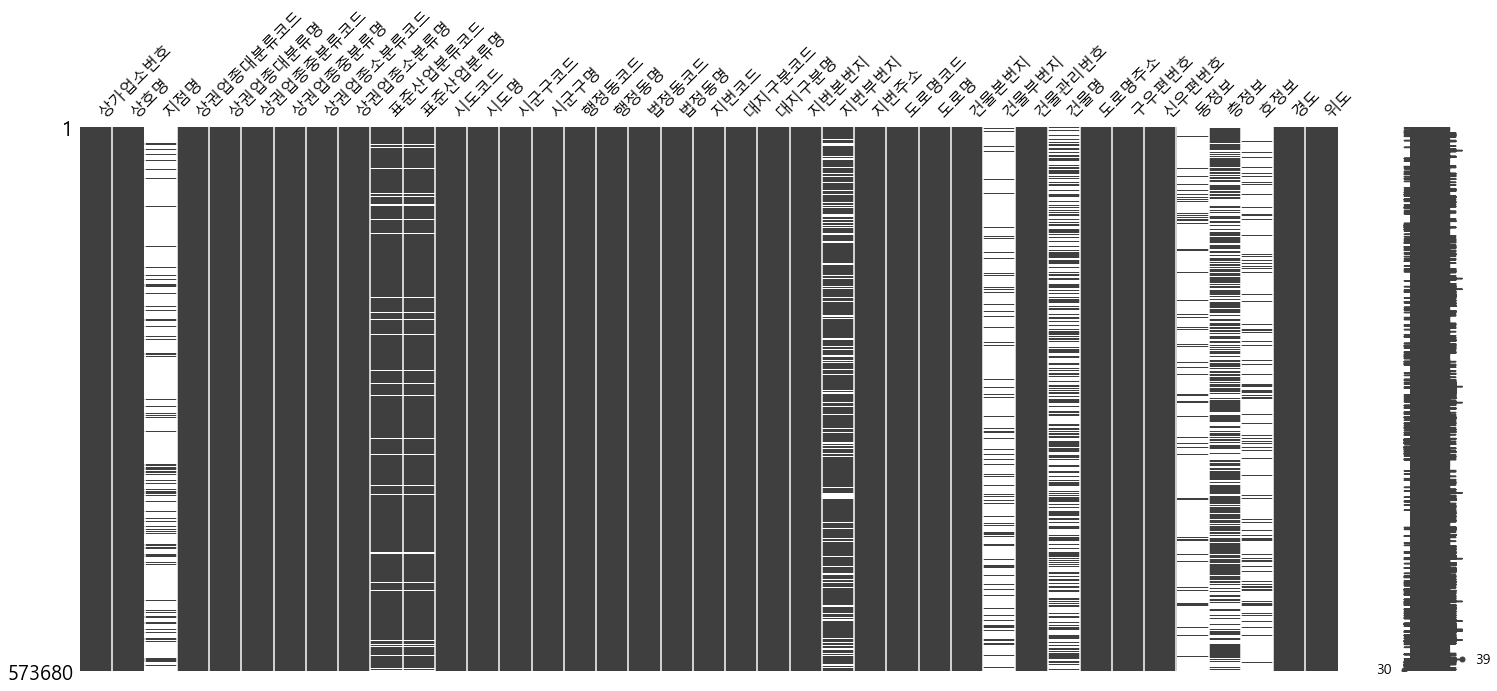

In [10]:
msno.matrix(df)

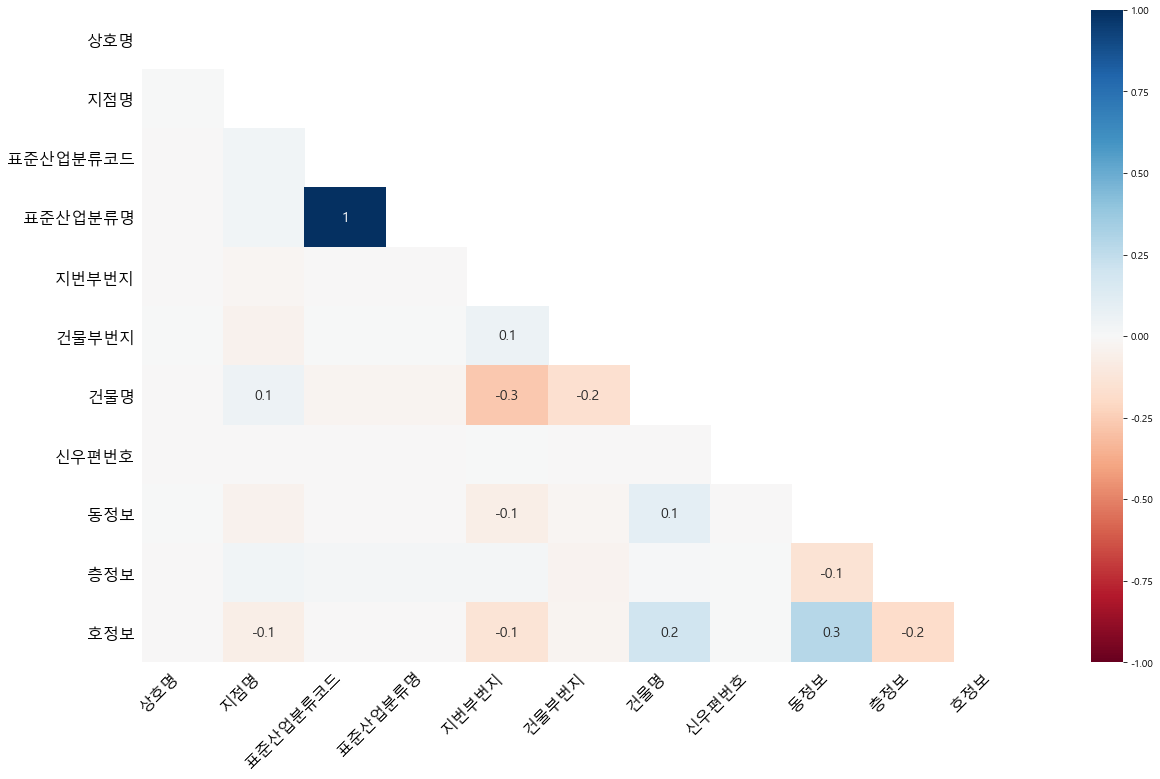

In [11]:
msno.heatmap(df)

## 결측치가 너무 많은 컬럼 제거

In [12]:
not_use=n.sort_values(ascending=False).head(9)
not_use_col=not_use.index
not_use_col

Index(['동정보', '건물부번지', '지점명', '호정보', '건물명', '층정보', '지번부번지', '표준산업분류명',
       '표준산업분류코드'],
      dtype='object')

In [13]:
print(df.shape)
df=df.drop(not_use_col,axis=1) #axis=0 행 1 열
print(df.shape)

(573680, 39)
(573680, 30)


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 30 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     573680 non-null  int64  
 1   상호명        573679 non-null  object 
 2   상권업종대분류코드  573680 non-null  object 
 3   상권업종대분류명   573680 non-null  object 
 4   상권업종중분류코드  573680 non-null  object 
 5   상권업종중분류명   573680 non-null  object 
 6   상권업종소분류코드  573680 non-null  object 
 7   상권업종소분류명   573680 non-null  object 
 8   시도코드       573680 non-null  int64  
 9   시도명        573680 non-null  object 
 10  시군구코드      573680 non-null  int64  
 11  시군구명       573680 non-null  object 
 12  행정동코드      573680 non-null  int64  
 13  행정동명       573680 non-null  object 
 14  법정동코드      573680 non-null  int64  
 15  법정동명       573680 non-null  object 
 16  지번코드       573680 non-null  int64  
 17  대지구분코드     573680 non-null  int64  
 18  대지구분명      573680 non-null  object 
 19  지번본번지      573680 non-n

## 사용하지 않는 컬럼 제거

In [15]:
cols=df.columns
cols

Index(['상가업소번호', '상호명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드', '상권업종중분류명',
       '상권업종소분류코드', '상권업종소분류명', '시도코드', '시도명', '시군구코드', '시군구명', '행정동코드',
       '행정동명', '법정동코드', '법정동명', '지번코드', '대지구분코드', '대지구분명', '지번본번지', '지번주소',
       '도로명코드', '도로명', '건물본번지', '건물관리번호', '도로명주소', '구우편번호', '신우편번호', '경도',
       '위도'],
      dtype='object')

In [16]:
cols_code=cols[cols.str.contains("코드|번호")]
cols_code

Index(['상가업소번호', '상권업종대분류코드', '상권업종중분류코드', '상권업종소분류코드', '시도코드', '시군구코드',
       '행정동코드', '법정동코드', '지번코드', '대지구분코드', '도로명코드', '건물관리번호', '구우편번호',
       '신우편번호'],
      dtype='object')

In [17]:
df=df.drop(cols_code,axis=1)
print(df.shape)

(573680, 16)


## 행,열을 기준으로 값 가져오기

* df.loc[행,열]
* 여러개 가져올때는 list 형태로 [] 필수

In [18]:
df[["상호명","도로명주소"]].head()

,상호명,도로명주소
0,와라와라호프,서울특별시 강남구 남부순환로 2933
1,커피빈코리아선릉로93길점,서울특별시 강남구 선릉로93길 6
2,프로포즈,서울특별시 금천구 가산로 34-6
3,싱싱커피&토스트,부산광역시 사상구 괘감로 37
4,가락사우나내스낵,서울특별시 송파구 가락로 71


In [19]:
df.loc[0]

상호명                       와라와라호프
상권업종대분류명                      음식
상권업종중분류명                    유흥주점
상권업종소분류명                   호프/맥주
시도명                        서울특별시
시군구명                         강남구
행정동명                        대치1동
법정동명                         대치동
대지구분명                         대지
지번본번지                        604
지번주소           서울특별시 강남구 대치동 604
도로명              서울특별시 강남구 남부순환로
건물본번지                       2933
도로명주소       서울특별시 강남구 남부순환로 2933
경도                       127.061
위도                       37.4939
Name: 0, dtype: object

In [20]:
df.loc[[0,1]]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,대지,604,서울특별시 강남구 대치동 604,서울특별시 강남구 남부순환로,2933,서울특별시 강남구 남부순환로 2933,127.061026,37.493922
1,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼1동,역삼동,대지,696,서울특별시 강남구 역삼동 696-42,서울특별시 강남구 선릉로93길,6,서울특별시 강남구 선릉로93길 6,127.047883,37.505675


In [21]:
df.loc[[0,1,2],"상호명"]

0           와라와라호프
1    커피빈코리아선릉로93길점
2             프로포즈
Name: 상호명, dtype: object

In [22]:
df.loc[[0,1,2],["상호명"]]

,상호명
0,와라와라호프
1,커피빈코리아선릉로93길점
2,프로포즈


In [23]:
df.iloc[:5,:5]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시
1,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시
2,프로포즈,음식,유흥주점,호프/맥주,서울특별시
3,싱싱커피&토스트,음식,패스트푸드,토스트전문,부산광역시
4,가락사우나내스낵,생활서비스,대중목욕탕/휴게,사우나/증기탕/온천,서울특별시


## 기술통계값

In [24]:
df.describe().round()

,지번본번지,건물본번지,경도,위도
count,573680.0,573680.0,573680.0,573680.0
mean,469.0,154.0,128.0,37.0
std,485.0,277.0,1.0,1.0
min,1.0,0.0,127.0,35.0
25%,109.0,20.0,127.0,35.0
50%,335.0,50.0,127.0,38.0
75%,678.0,172.0,129.0,38.0
max,9999.0,3318.0,129.0,38.0


In [25]:
df[["위도","경도"]].describe()

,위도,경도
count,573680.000000,573680.000000
mean,36.854698,127.596287
std,1.081285,0.941262
min,35.006760,126.768169
25%,35.215422,126.968316
50%,37.511207,127.047672
75%,37.560362,128.986938
max,37.692398,129.292243


In [26]:
df["위도"].count()

573680

In [27]:
df["위도"].max()

37.69239838166121

In [28]:
df["위도"].std()

1.0812845231395738

## 단변량 수치형 변수 시각화

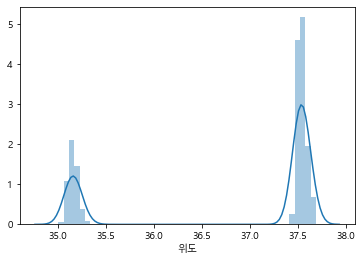

In [29]:
sns.distplot(df["위도"])

* 서울과 부산의 위도

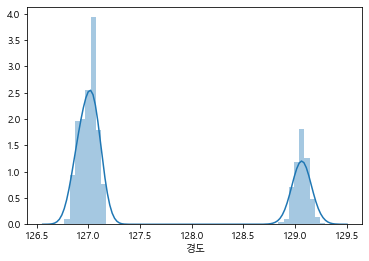

In [30]:
sns.distplot(df["경도"])

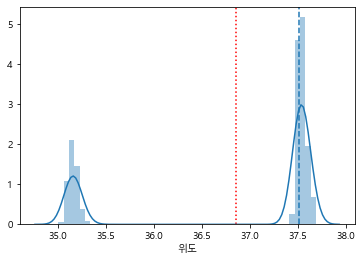

In [31]:
plt.axvline(df["위도"].mean(),linestyle=":",color='r')
plt.axvline(df["위도"].median(),linestyle="--")
sns.distplot(df["위도"])

## 상관계수 ; 이변량 데이터

In [32]:
corr=df.corr()

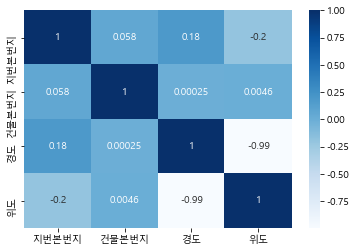

In [33]:
sns.heatmap(corr,annot=True,cmap="Blues")

## 산점도 ; 이변량 수치형 변수

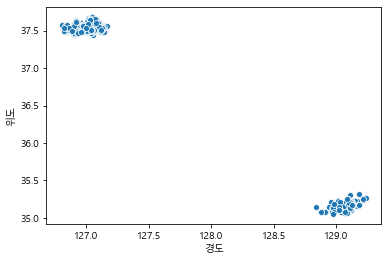

In [34]:
sns.scatterplot(data=df.sample(1000),x="경도",y="위도")

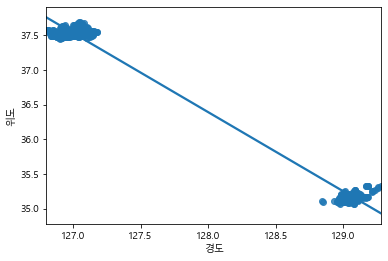

In [35]:
# 회귀선까지 그리기
sns.regplot(data=df.sample(1000),x="경도",y="위도") 

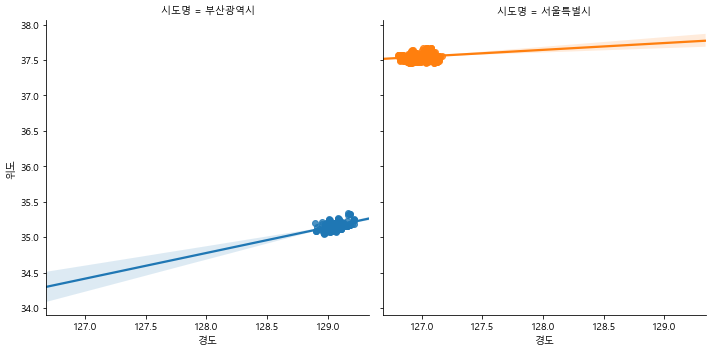

In [36]:
sns.lmplot(data=df.sample(1000),x="경도",y="위도",hue="시도명",col="시도명",truncate=False, fit_reg=True)

## object 타입 데이터 요약

In [37]:
df.describe(include="object")

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,도로명주소
count,573679,573680,573680,573680,573680,573680,573680,573680,573680,573680,573680,573680
unique,378758,9,94,709,2,39,629,648,2,190237,18001,190486
top,점프셈교실,음식,한식,한식/백반/한정식,서울특별시,강남구,역삼1동,역삼동,대지,부산광역시 부산진구 부전동 503-15,서울특별시 서초구 신반포로,부산광역시 부산진구 가야대로 772
freq,2297,185516,59725,38133,407376,47080,10400,12102,572913,1058,3543,1058


In [38]:
df["상권업종대분류명"].describe()

count     573680
unique         9
top           음식
freq      185516
Name: 상권업종대분류명, dtype: object

In [39]:
df["상권업종대분류명"].unique()

array(['음식', '생활서비스', '소매', '의료', '학문/교육', '관광/여가/오락', '부동산', '숙박', '스포츠'],
      dtype=object)

## 범주형 변수의 빈도수 구하기

In [40]:
df["상권업종대분류명"].value_counts()

음식          185516
소매          179460
생활서비스        97789
학문/교육        42477
의료           25509
부동산          20918
관광/여가/오락     16377
숙박            5327
스포츠            307
Name: 상권업종대분류명, dtype: int64

## 인덱싱과 필터로 서브셋 만들기

In [41]:
df_food=df[df["상권업종대분류명"]=="음식"].copy()
df_food

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,대지,604,서울특별시 강남구 대치동 604,서울특별시 강남구 남부순환로,2933,서울특별시 강남구 남부순환로 2933,127.061026,37.493922
1,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼1동,역삼동,대지,696,서울특별시 강남구 역삼동 696-42,서울특별시 강남구 선릉로93길,6,서울특별시 강남구 선릉로93길 6,127.047883,37.505675
2,프로포즈,음식,유흥주점,호프/맥주,서울특별시,금천구,독산3동,독산동,대지,162,서울특별시 금천구 독산동 162-1,서울특별시 금천구 가산로,34,서울특별시 금천구 가산로 34-6,126.899220,37.471711
3,싱싱커피&토스트,음식,패스트푸드,토스트전문,부산광역시,사상구,괘법동,괘법동,대지,578,부산광역시 사상구 괘법동 578,부산광역시 사상구 괘감로,37,부산광역시 사상구 괘감로 37,128.980455,35.159774
5,초밥왕,음식,일식/수산물,음식점-초밥전문,서울특별시,송파구,잠실6동,신천동,대지,7,서울특별시 송파구 신천동 7-28,서울특별시 송파구 올림픽로,293,서울특별시 송파구 올림픽로 293-19,127.102490,37.515149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573658,브레드앤로즈,음식,제과제빵떡케익,제과점,서울특별시,성동구,성수1가1동,성수동1가,대지,685,서울특별시 성동구 성수동1가 685-704,서울특별시 성동구 왕십리로,63,서울특별시 성동구 왕십리로 63,127.043565,37.543610
573669,스테프핫도그,음식,패스트푸드,패스트푸드,서울특별시,마포구,도화동,마포동,대지,418,서울특별시 마포구 마포동 418-1,서울특별시 마포구 마포대로4다길,41,서울특별시 마포구 마포대로4다길 41,126.943989,37.535121
573670,평창갈비,음식,한식,갈비/삼겹살,서울특별시,송파구,방이1동,방이동,대지,165,서울특별시 송파구 방이동 165-3,서울특별시 송파구 위례성대로,98,서울특별시 송파구 위례성대로 98,127.122565,37.513543
573671,휴돈정,음식,양식,돈가스전문점,서울특별시,노원구,공릉1동,공릉동,대지,383,서울특별시 노원구 공릉동 383-12,서울특별시 노원구 동일로191가길,6,서울특별시 노원구 동일로191가길 6,127.071622,37.625316


### 강남구의 상권업종대분류명이 음식인 곳만 파악

In [42]:
df[df["시군구명"]=="강남구"]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,대지,604,서울특별시 강남구 대치동 604,서울특별시 강남구 남부순환로,2933,서울특별시 강남구 남부순환로 2933,127.061026,37.493922
1,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼1동,역삼동,대지,696,서울특별시 강남구 역삼동 696-42,서울특별시 강남구 선릉로93길,6,서울특별시 강남구 선릉로93길 6,127.047883,37.505675
26,쉼터,음식,분식,라면김밥분식,서울특별시,강남구,삼성1동,삼성동,대지,159,서울특별시 강남구 삼성동 159,서울특별시 강남구 봉은사로,524,서울특별시 강남구 봉은사로 524,127.057100,37.512939
27,배제현의웰빙낙지한마리수제비,음식,일식/수산물,낙지/오징어,서울특별시,강남구,신사동,신사동,대지,512,서울특별시 강남구 신사동 512-13,서울특별시 강남구 강남대로152길,19,서울특별시 강남구 강남대로152길 19,127.020945,37.517574
38,타워광명내과의원,의료,병원,내과/외과,서울특별시,강남구,도곡2동,도곡동,대지,467,서울특별시 강남구 도곡동 467-14,서울특별시 강남구 언주로30길,39,서울특별시 강남구 언주로30길 39,127.053198,37.488742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573668,킹덤코리아,소매,음/식료품소매,청과물소매,서울특별시,강남구,역삼2동,역삼동,대지,720,서울특별시 강남구 역삼동 720-9,서울특별시 강남구 테헤란로38길,5,서울특별시 강남구 테헤란로38길 5,127.041635,37.501642
573672,심스틸러,소매,의복의류,캐쥬얼/스포츠의류,서울특별시,강남구,논현1동,논현동,대지,16,서울특별시 강남구 논현동 16-40,서울특별시 강남구 강남대로146길,7,서울특별시 강남구 강남대로146길 7,127.020698,37.514833
573673,밀리온골프,소매,의복의류,캐쥬얼/스포츠의류,서울특별시,강남구,압구정동,신사동,대지,648,서울특별시 강남구 신사동 648-8,서울특별시 강남구 도산대로49길,21,서울특별시 강남구 도산대로49길 21,127.036900,37.524247
573674,헤리티크뉴욕,소매,의복의류,예복/웨딩드레스,서울특별시,강남구,압구정동,신사동,대지,650,서울특별시 강남구 신사동 650-7,서울특별시 강남구 도산대로45길,16,서울특별시 강남구 도산대로45길 16-9,127.036036,37.523645


In [43]:
df[(df["시군구명"]=="강남구")&(df["상권업종대분류명"]=="음식")]["상권업종중분류명"].value_counts()

한식         4371
커피점/카페     2790
양식         1573
유흥주점       1573
일식/수산물     1255
분식         1197
패스트푸드       786
제과제빵떡케익     650
닭/오리요리      539
중식          358
별식/퓨전요리     341
부페           63
기타음식업        47
음식배달서비스      11
Name: 상권업종중분류명, dtype: int64

In [44]:
df.loc[(df["시군구명"]=="강남구")&(df["상권업종대분류명"]=="음식"),"상권업종중분류명"].value_counts()

한식         4371
커피점/카페     2790
양식         1573
유흥주점       1573
일식/수산물     1255
분식         1197
패스트푸드       786
제과제빵떡케익     650
닭/오리요리      539
중식          358
별식/퓨전요리     341
부페           63
기타음식업        47
음식배달서비스      11
Name: 상권업종중분류명, dtype: int64

### 구별 음식점 업종 비교

In [45]:
df_seoul_food=df[(df["시도명"]=="서울특별시")&(df["상권업종대분류명"]=="음식")].copy()
df_seoul_food.shape

(132889, 16)

In [46]:
food_gu=df_seoul_food.groupby(["시군구명","상권업종중분류명"])["상호명"].count()
food_gu.head()

시군구명  상권업종중분류명
강남구   기타음식업         47
      닭/오리요리       539
      별식/퓨전요리      341
      부페            63
      분식          1197
Name: 상호명, dtype: int64

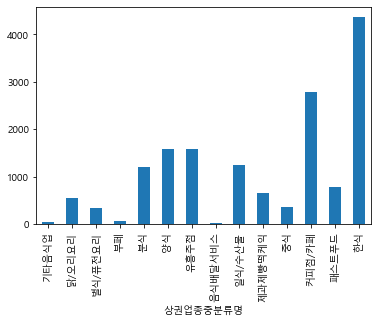

In [47]:
food_gu.unstack().loc["강남구"].plot.bar()

In [48]:
food=food_gu.reset_index()
food=food.rename(columns={"상호명":"상호수"})
food.head()

,시군구명,상권업종중분류명,상호수
0,강남구,기타음식업,47
1,강남구,닭/오리요리,539
2,강남구,별식/퓨전요리,341
3,강남구,부페,63
4,강남구,분식,1197


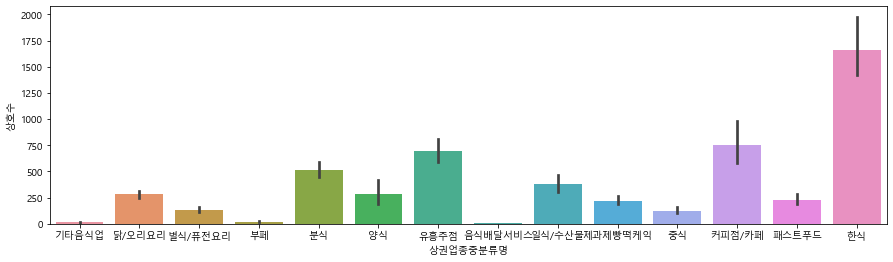

In [49]:
plt.figure(figsize=(15,4))
sns.barplot(data=food, x="상권업종중분류명",y="상호수")

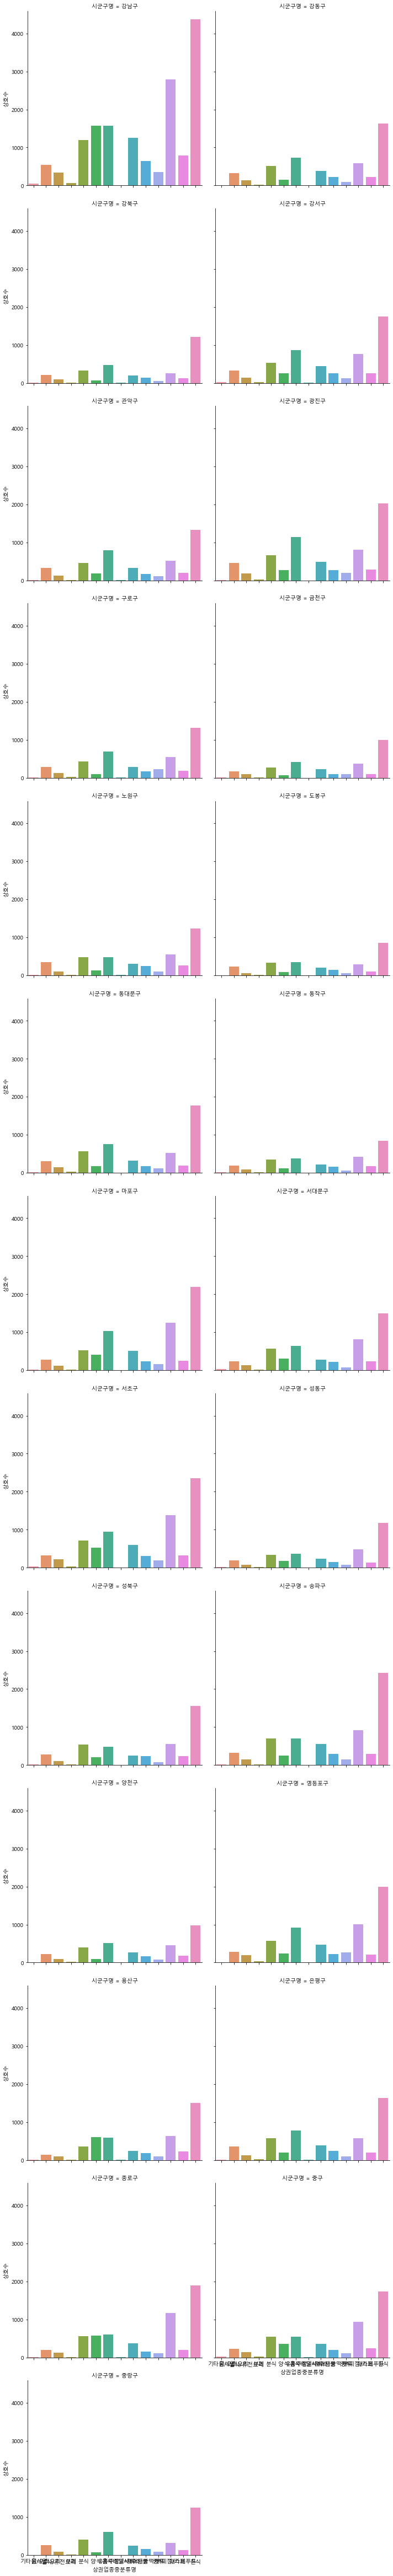

In [50]:
# subplot 그리기
sns.catplot(data=food, x="상권업종중분류명",y="상호수",kind="bar",col="시군구명",col_wrap=2)

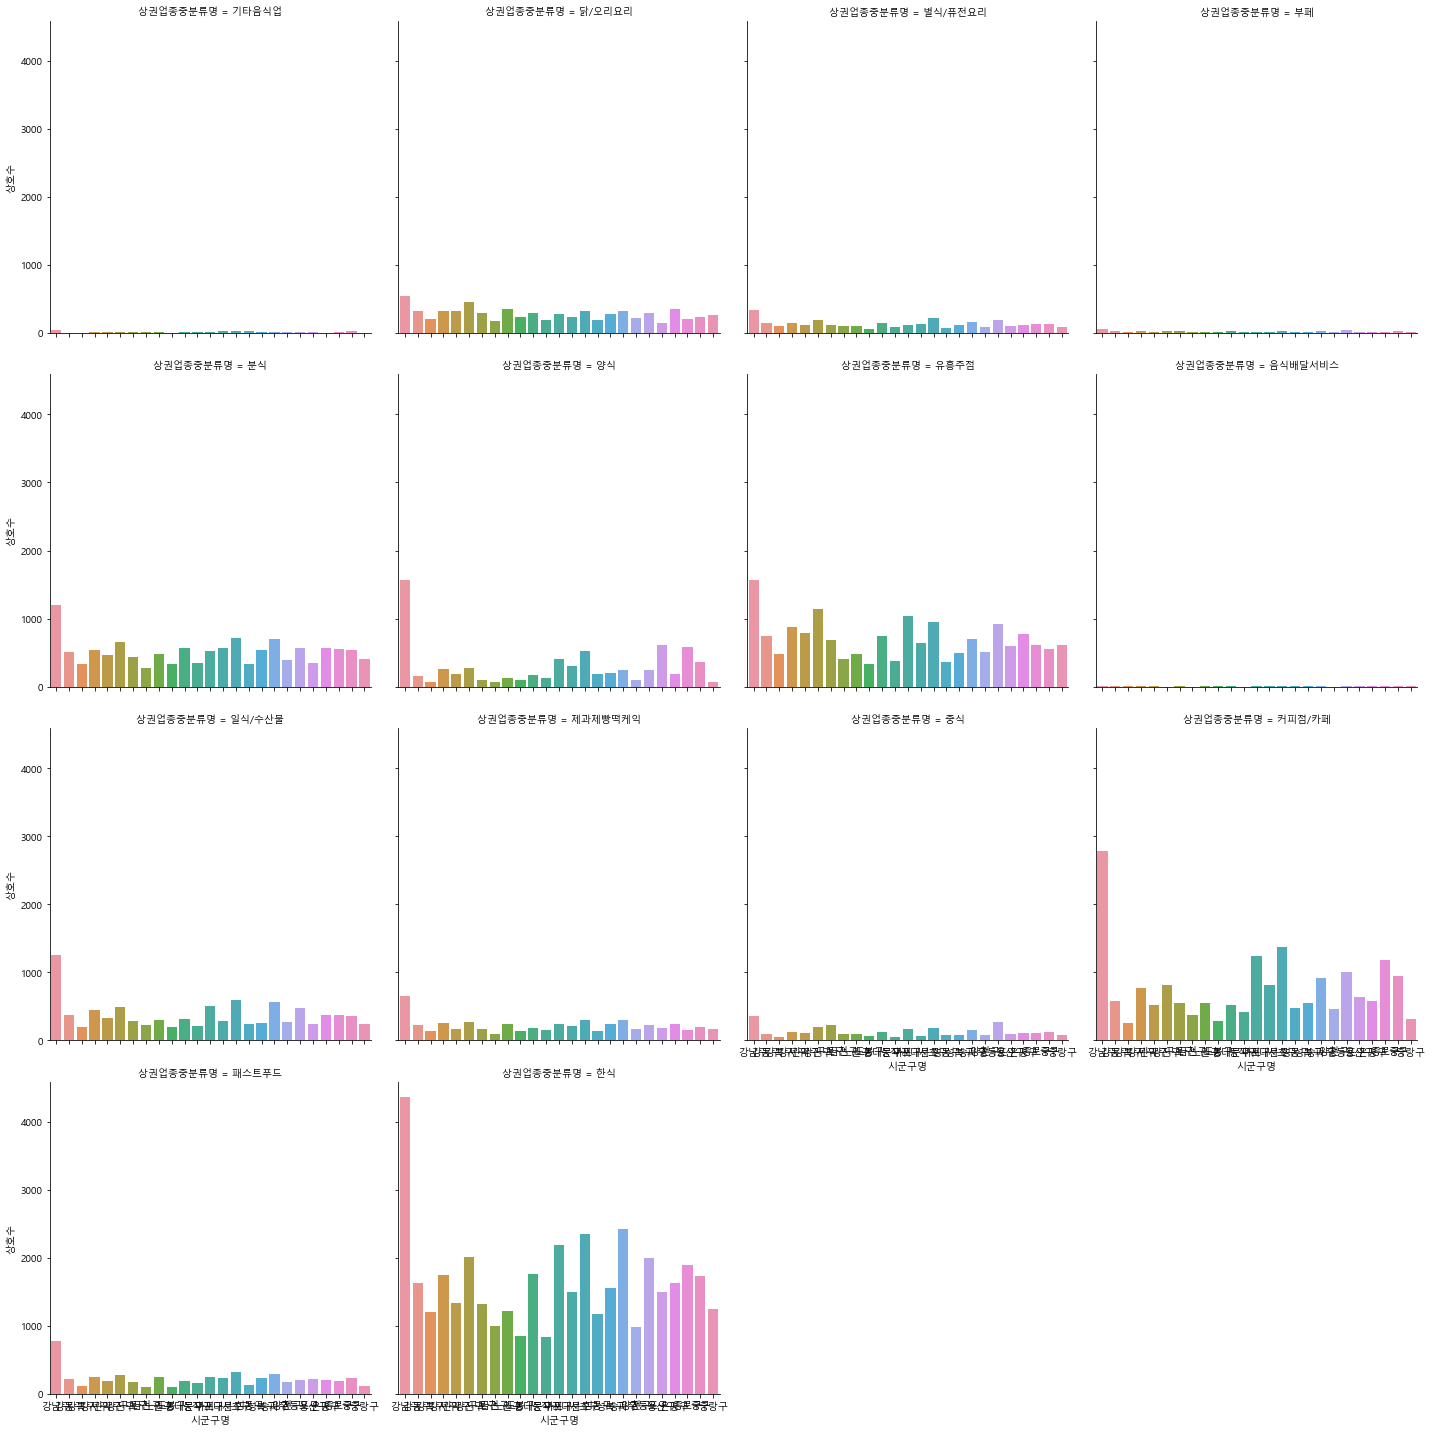

In [51]:
sns.catplot(data=food, x="시군구명",y="상호수",kind="bar",col="상권업종중분류명",col_wrap=4)

### 구별 학원수 비교

* 주거나 입지로 문화시설이나 학원, 교육 등을 고려하게 된다
* 사교육이 발달한 지역으로 알려진 대치동과 목동을 분석

#### 서브셋 

In [52]:
df["상권업종대분류명"].unique()

array(['음식', '생활서비스', '소매', '의료', '학문/교육', '관광/여가/오락', '부동산', '숙박', '스포츠'],
      dtype=object)

In [56]:
df_academy = df[(df["시도명"]=="서울특별시") & (df["상권업종대분류명"]=="학문/교육")].copy()
df_academy["지번본번지"] = df_academy["지번본번지"].astype(int)
df_academy.head()

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
85,GIA보석교육원,학문/교육,학원-자격/국가고시,학원-보석감정,서울특별시,강남구,압구정동,신사동,대지,639,서울특별시 강남구 신사동 639-3,서울특별시 강남구 압구정로,320,서울특별시 강남구 압구정로 320,127.036437,37.528532
101,안재형영어,학문/교육,학원-어학,학원-외국어/어학,서울특별시,양천구,목5동,목동,대지,905,서울특별시 양천구 목동 905-34,서울특별시 양천구 목동서로,133,서울특별시 양천구 목동서로 133-2,126.875973,37.531592
121,정아트,학문/교육,학원-음악미술무용,서예/서화/미술,서울특별시,강서구,염창동,염창동,대지,184,서울특별시 강서구 염창동 184-8,서울특별시 강서구 양천로73가길,21,서울특별시 강서구 양천로73가길 21,126.873645,37.550924
126,경찰태권도,학문/교육,학원-예능취미체육,태권도장,서울특별시,성북구,길음1동,길음동,대지,1283,서울특별시 성북구 길음동 1283-4,서울특별시 성북구 길음로,20,서울특별시 성북구 길음로 20,127.023020,37.604749
134,아트인스튜디오,학문/교육,학원-음악미술무용,서예/서화/미술,서울특별시,강남구,역삼1동,역삼동,대지,818,서울특별시 강남구 역삼동 818-1,서울특별시 강남구 강남대로96길,12,서울특별시 강남구 강남대로96길 12,127.028054,37.499729


In [59]:
df_academy["상호명"].value_counts().head(10)

점프셈교실      1659
해법수학         57
윤선생영어교실      34
뮤엠영어         27
해법영어교실       24
해동검도         22
눈높이          22
삼성영어         21
구몬학습         20
경희대태권도       19
Name: 상호명, dtype: int64

In [60]:
df_academy["시군구명"].value_counts()

강남구     4005
서초구     2103
양천구     1881
광진구     1848
송파구     1797
강동구     1585
노원구     1582
강서구     1498
은평구     1333
관악구     1313
성북구     1246
구로구     1140
동대문구    1051
동작구     1050
마포구     1007
영등포구     984
도봉구      931
중랑구      884
서대문구     773
성동구      742
금천구      701
종로구      638
강북구      513
용산구      491
중구       413
Name: 시군구명, dtype: int64

In [63]:
# 상권업종소분류명으로 빈도수 파악
academy_count = df_academy["상권업종소분류명"].value_counts().head(10)
academy_count

학원-입시          7509
학원(종합)         4561
어린이집           4395
학원-외국어/어학      3544
피아노/바이올린/기타    2868
서예/서화/미술       1595
독서실            1096
고시원            1062
학원-기타           677
태권도장            610
Name: 상권업종소분류명, dtype: int64

In [66]:
academy_count_1000 = academy_count[academy_count > 1000]
academy_count_1000

학원-입시          7509
학원(종합)         4561
어린이집           4395
학원-외국어/어학      3544
피아노/바이올린/기타    2868
서예/서화/미술       1595
독서실            1096
고시원            1062
Name: 상권업종소분류명, dtype: int64

In [72]:
academy_group = df_academy.groupby(["시군구명","상권업종소분류명"])["상호명"].count()
academy_group

시군구명  상권업종소분류명   
강남구   검도도장             9
      고시원            139
      놀이방              8
      독서실            125
      서예/서화/미술       219
                    ... 
중랑구   학원-입시          172
      학원-주산암산부기속셈      7
      학원-펜글씨/한문        1
      학원/국가고시          2
      합기도장             2
Name: 상호명, Length: 1118, dtype: int64

In [74]:
t = academy_group.reset_index()
t=t.rename(columns={"상호명":"상호수"})
t

,시군구명,상권업종소분류명,상호수
0,강남구,검도도장,9
1,강남구,고시원,139
2,강남구,놀이방,8
3,강남구,독서실,125
4,강남구,서예/서화/미술,219
...,...,...,...
1113,중랑구,학원-입시,172
1114,중랑구,학원-주산암산부기속셈,7
1115,중랑구,학원-펜글씨/한문,1
1116,중랑구,학원/국가고시,2


#### 시각화

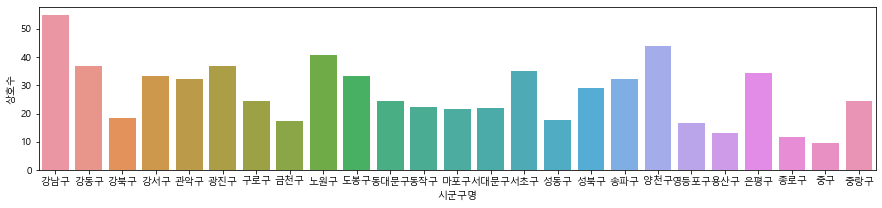

In [77]:
plt.figure(figsize=(15,3))
sns.barplot(data=t, x="시군구명",y="상호수",ci=None)

In [97]:
df_academy_selected = df_academy[df_academy["상권업종소분류명"].isin(academy_count_1000.index)]
df_academy_selected

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
101,안재형영어,학문/교육,학원-어학,학원-외국어/어학,서울특별시,양천구,목5동,목동,대지,905,서울특별시 양천구 목동 905-34,서울특별시 양천구 목동서로,133,서울특별시 양천구 목동서로 133-2,126.875973,37.531592
121,정아트,학문/교육,학원-음악미술무용,서예/서화/미술,서울특별시,강서구,염창동,염창동,대지,184,서울특별시 강서구 염창동 184-8,서울특별시 강서구 양천로73가길,21,서울특별시 강서구 양천로73가길 21,126.873645,37.550924
134,아트인스튜디오,학문/교육,학원-음악미술무용,서예/서화/미술,서울특별시,강남구,역삼1동,역삼동,대지,818,서울특별시 강남구 역삼동 818-1,서울특별시 강남구 강남대로96길,12,서울특별시 강남구 강남대로96길 12,127.028054,37.499729
151,삼익피아노강동대리점,학문/교육,학원-음악미술무용,피아노/바이올린/기타,서울특별시,강동구,천호3동,천호동,대지,410,서울특별시 강동구 천호동 410-105,서울특별시 강동구 진황도로,18,서울특별시 강동구 진황도로 18,127.129075,37.539262
153,파랑새어린이집,학문/교육,유아교육,어린이집,서울특별시,도봉구,창1동,창동,대지,374,서울특별시 도봉구 창동 374,서울특별시 도봉구 덕릉로,329,서울특별시 도봉구 덕릉로 329,127.045486,37.644831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573529,쌤통수학교습소,학문/교육,학원-보습교습입시,학원-입시,서울특별시,서대문구,홍제2동,홍제동,대지,106,서울특별시 서대문구 홍제동 106,서울특별시 서대문구 통일로34길,24,서울특별시 서대문구 통일로34길 24,126.949389,37.585709
573654,골든벨독서실,학문/교육,도서관/독서실,독서실,서울특별시,양천구,신월2동,신월동,대지,447,서울특별시 양천구 신월동 447-5,서울특별시 양천구 월정로,56,서울특별시 양천구 월정로 56,126.841706,37.524719
573656,에이디링크연구소,학문/교육,학원기타,학원(종합),서울특별시,송파구,가락본동,가락동,대지,76,서울특별시 송파구 가락동 76,서울특별시 송파구 양재대로62길,47,서울특별시 송파구 양재대로62길 47,127.120757,37.495986
573661,도무스링구아,학문/교육,학원-보습교습입시,학원-입시,서울특별시,서초구,양재1동,우면동,대지,721,서울특별시 서초구 우면동 721-1,서울특별시 서초구 태봉로,70,서울특별시 서초구 태봉로 70,127.025571,37.464531


In [98]:
df_academy_selected["상권업종소분류명"].value_counts()

학원-입시          7509
학원(종합)         4561
어린이집           4395
학원-외국어/어학      3544
피아노/바이올린/기타    2868
서예/서화/미술       1595
독서실            1096
고시원            1062
Name: 상권업종소분류명, dtype: int64

In [99]:
df_academy_selected["시군구명"].value_counts()

강남구     3410
서초구     1732
양천구     1706
광진구     1536
송파구     1484
노원구     1425
강서구     1288
강동구     1255
은평구     1162
관악구     1115
성북구     1066
구로구      987
동작구      877
동대문구     863
마포구      857
도봉구      849
영등포구     775
중랑구      745
서대문구     656
성동구      642
금천구      568
종로구      479
강북구      444
용산구      395
중구       314
Name: 시군구명, dtype: int64

In [101]:
df_academy_selected.loc[df_academy_selected["법정동명"]=="대치동","상권업종소분류명"].value_counts()

학원-입시          831
학원-외국어/어학      281
학원(종합)         211
서예/서화/미술       113
피아노/바이올린/기타     60
독서실             42
고시원             30
어린이집            16
Name: 상권업종소분류명, dtype: int64

* 강남구의 대치동에는 입시학원이 많음

In [102]:
df_academy_selected.loc[df_academy_selected["법정동명"]=="목동","상권업종소분류명"].value_counts()

학원-입시          375
학원-외국어/어학      152
학원(종합)          88
어린이집            61
피아노/바이올린/기타     41
서예/서화/미술        39
독서실             22
고시원              7
Name: 상권업종소분류명, dtype: int64

* 양천구의 목동에는 입시학원이 많음

In [104]:
g=df_academy_selected.groupby(["상권업종소분류명","시군구명"])["상호명"].count()
g.loc["고시원"]

시군구명
강남구     139
강동구      62
강북구      11
강서구      32
관악구      83
광진구      81
구로구      33
금천구      24
노원구      14
도봉구       8
동대문구     69
동작구      79
마포구      29
서대문구     45
서초구      64
성동구      22
성북구      42
송파구      45
양천구      23
영등포구     30
용산구      16
은평구      12
종로구      41
중구       39
중랑구      19
Name: 상호명, dtype: int64

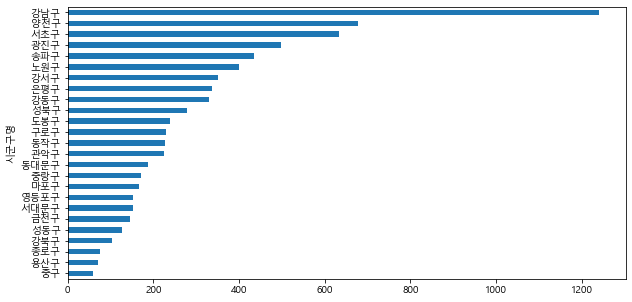

In [109]:
g.loc["학원-입시"].sort_values().plot.barh(figsize=(10,5))

In [111]:
g.unstack().iloc[:5,:5]

시군구명,강남구,강동구,강북구,강서구,관악구
상권업종소분류명,,,,,
고시원,139,62,11,32,83
독서실,125,46,14,60,69
서예/서화/미술,219,110,19,70,72
어린이집,189,210,112,262,220
피아노/바이올린/기타,266,189,47,150,139


In [113]:
g.unstack().T.iloc[:5,:5]

상권업종소분류명,고시원,독서실,서예/서화/미술,어린이집,피아노/바이올린/기타
시군구명,,,,,
강남구,139,125,219,189,266
강동구,62,46,110,210,189
강북구,11,14,19,112,47
강서구,32,60,70,262,150
관악구,83,69,72,220,139


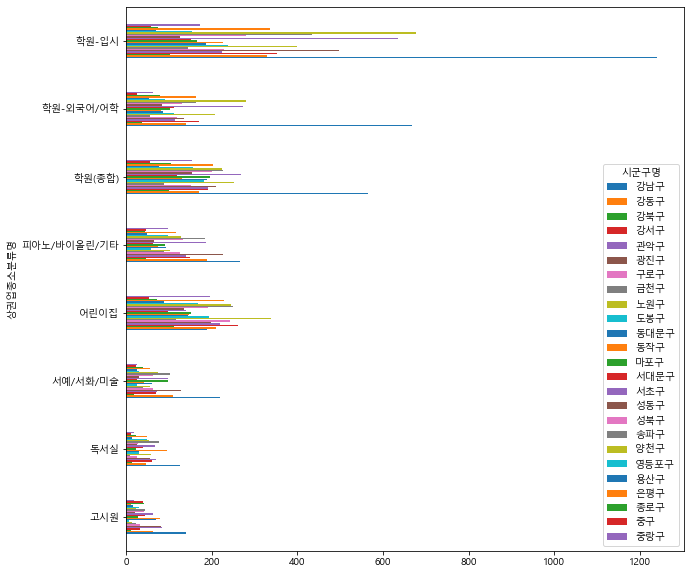

In [115]:
g.unstack().plot.barh(figsize=(10,10))

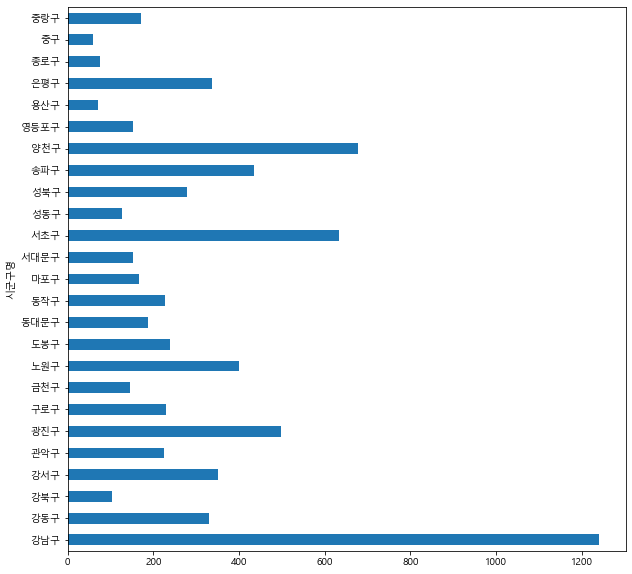

In [116]:
g.unstack().loc["학원-입시"].plot.barh(figsize=(10,10))

In [120]:
t=g.reset_index()
t=t.rename(columns={"상호명":"상호수"})
t

,상권업종소분류명,시군구명,상호수
0,고시원,강남구,139
1,고시원,강동구,62
2,고시원,강북구,11
3,고시원,강서구,32
4,고시원,관악구,83
...,...,...,...
195,학원-입시,용산구,70
196,학원-입시,은평구,337
197,학원-입시,종로구,75
198,학원-입시,중구,59


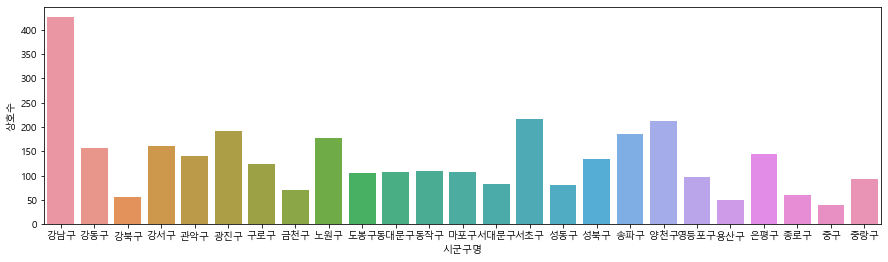

In [123]:
plt.figure(figsize=(15,4))
sns.barplot(data=t,x="시군구명",y="상호수",ci=None)

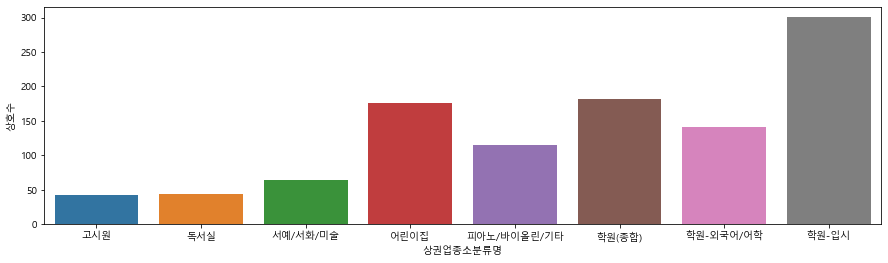

In [124]:
plt.figure(figsize=(15,4))
sns.barplot(data=t,x="상권업종소분류명",y="상호수",ci=None)

In [126]:
# 학원입시 subset
academy_sub=t[t["상권업종소분류명"]=="학원-입시"].copy()

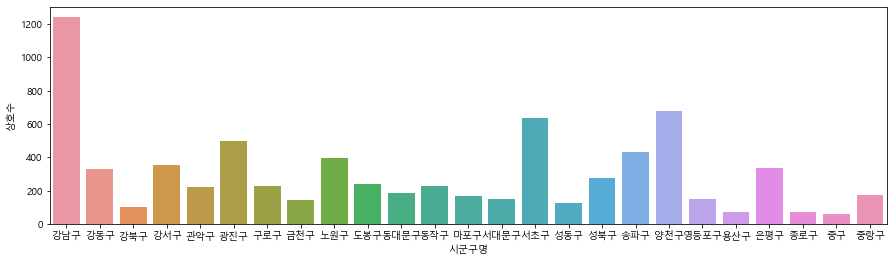

In [128]:
plt.figure(figsize=(15,4))
sns.barplot(data=academy_sub, x="시군구명",y="상호수")

* 입시학원이 많은곳은 강남구,서초구,양천구

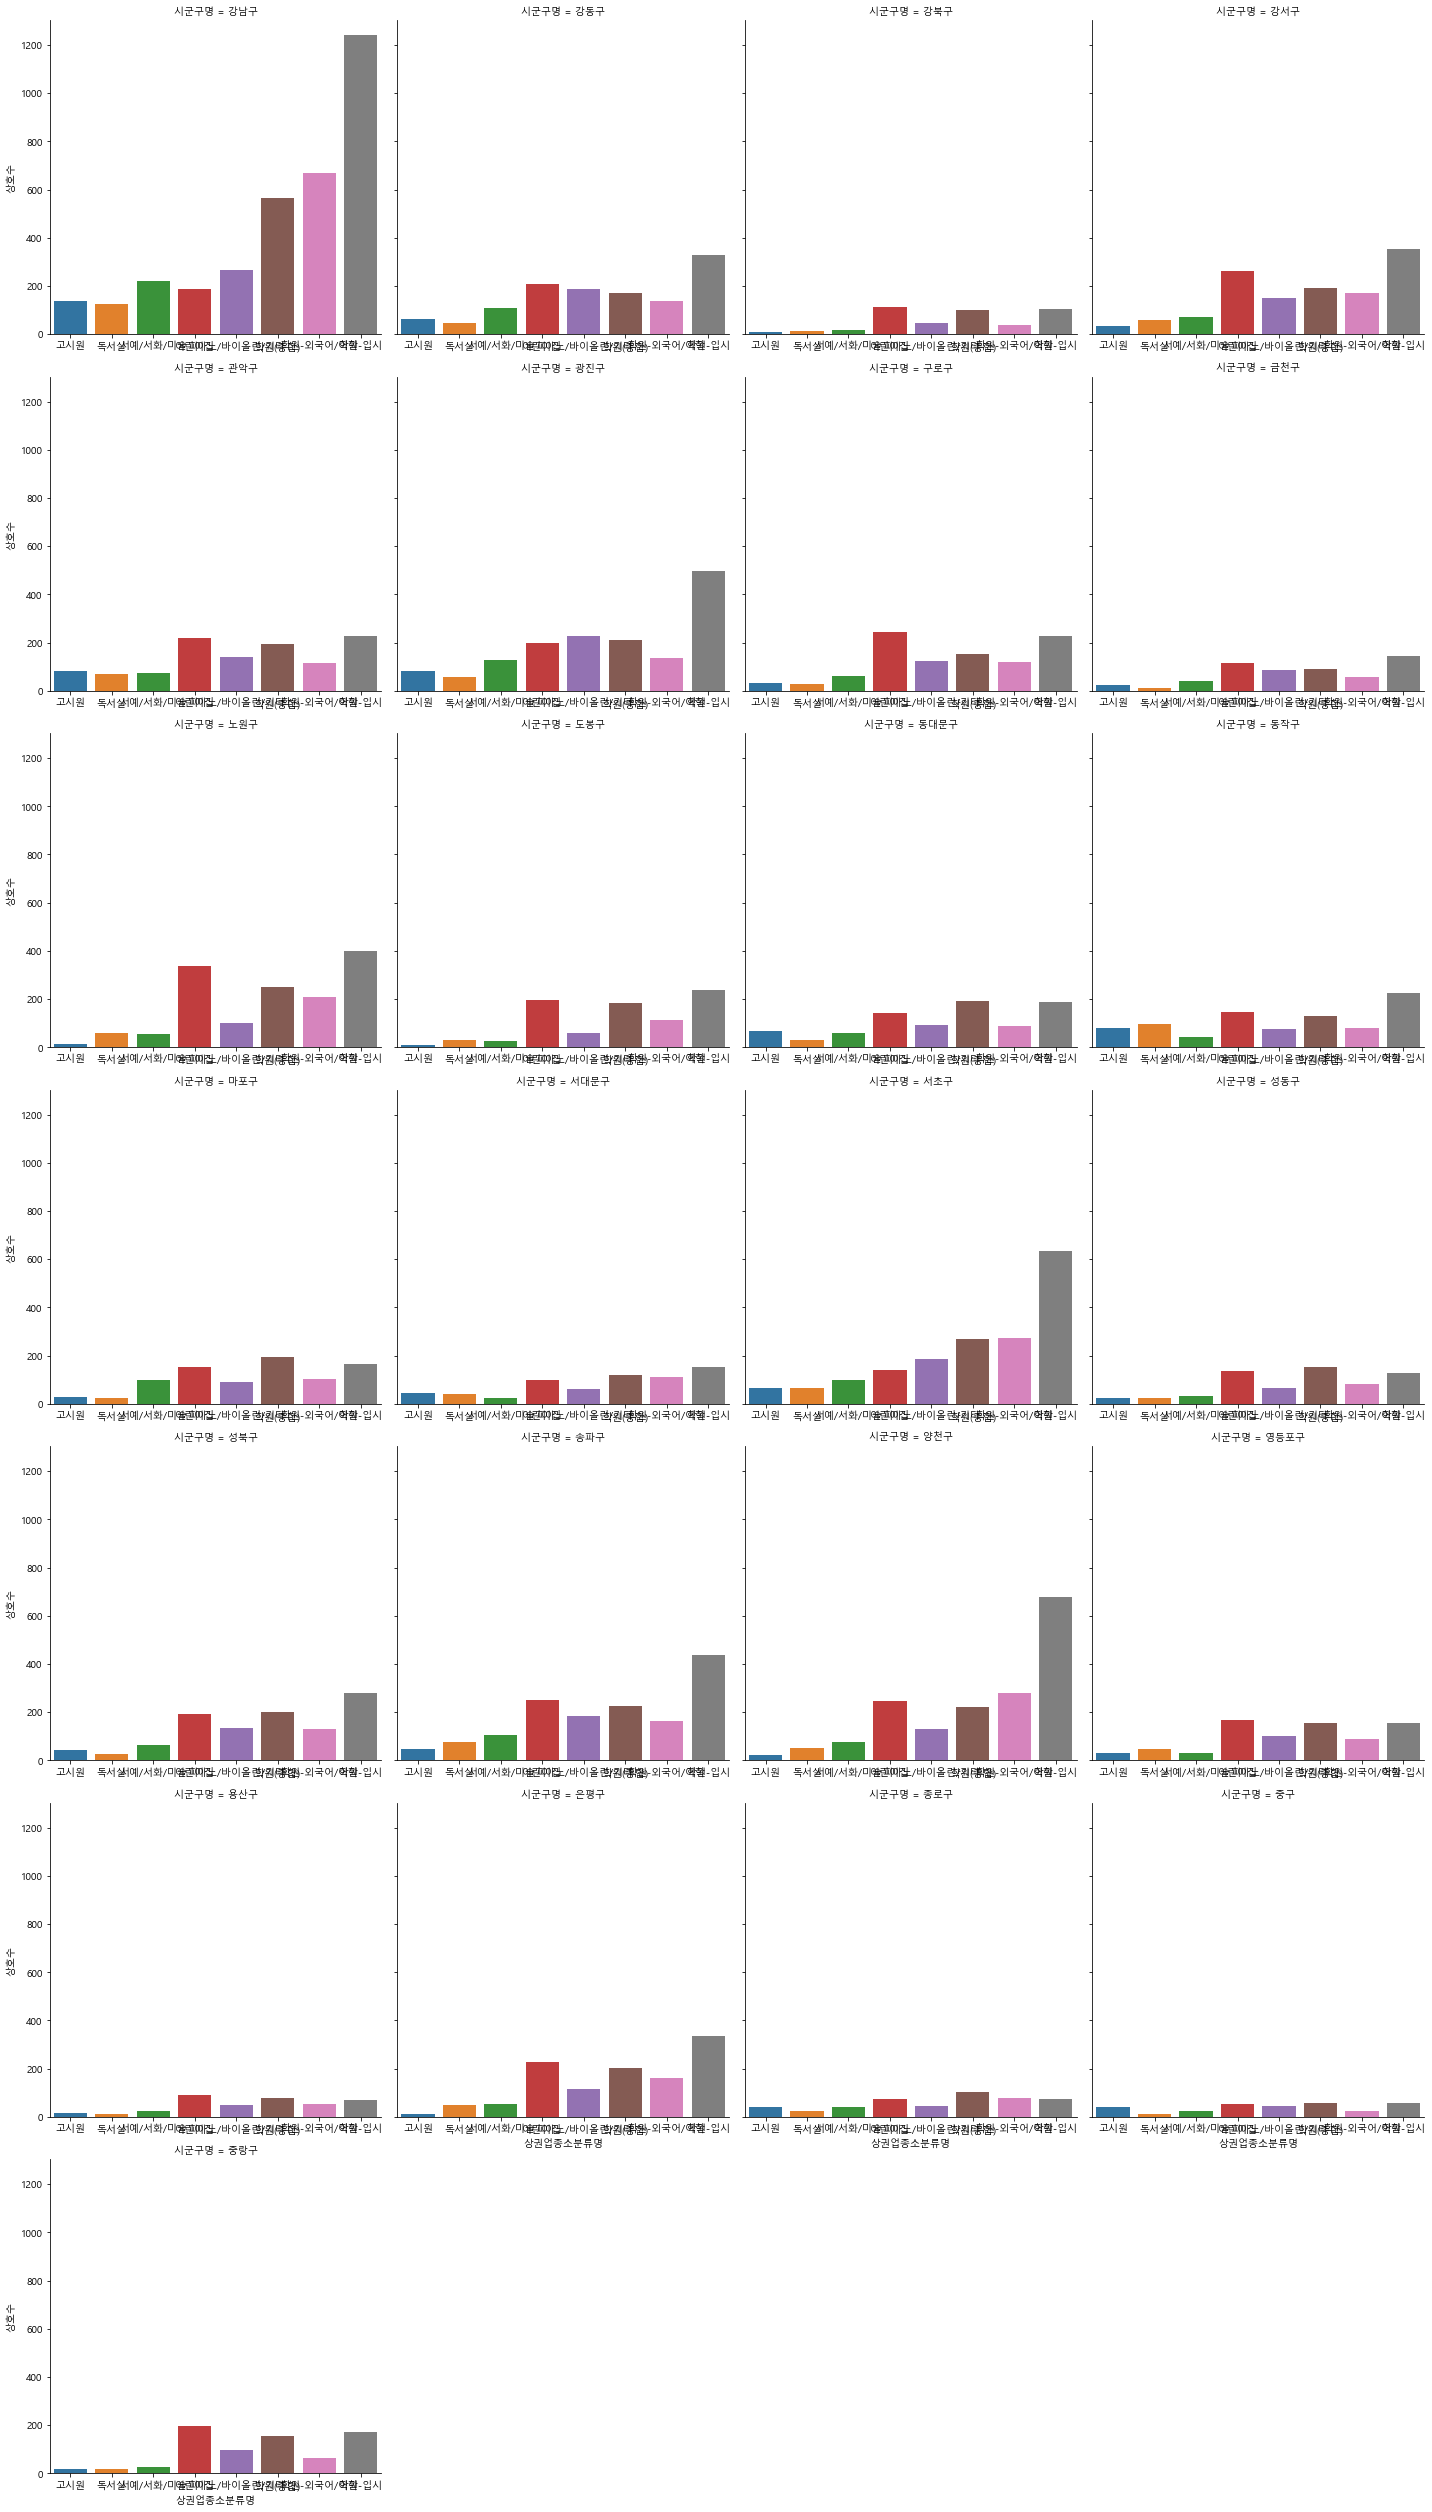

In [131]:
sns.catplot(data=t,x="상권업종소분류명",y="상호수",kind="bar",col="시군구명",col_wrap=4,sharex=False)

## 경도,위도 : scatterplot 

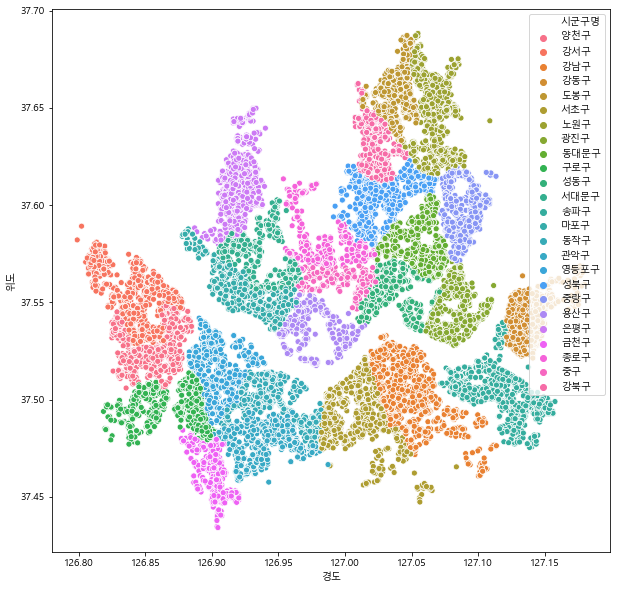

In [134]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_academy_selected,x="경도",y="위도",hue="시군구명")

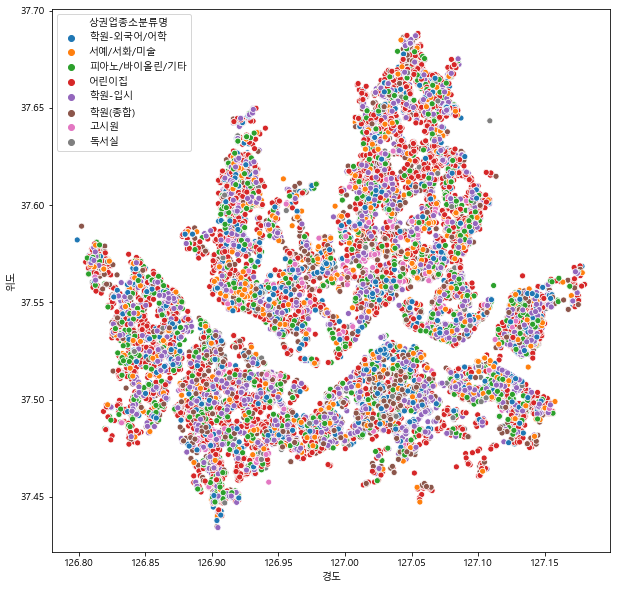

In [135]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_academy_selected,x="경도",y="위도",hue="상권업종소분류명")

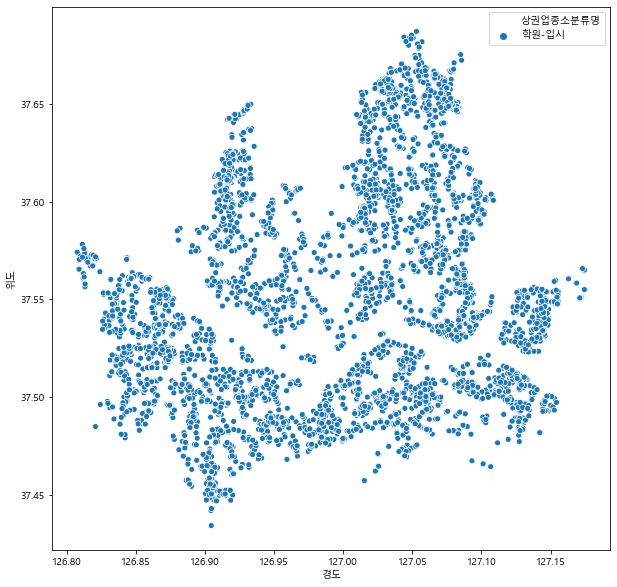

In [139]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_academy_selected[df_academy_selected["상권업종소분류명"]=="학원-입시"],x="경도",y="위도",hue="상권업종소분류명")

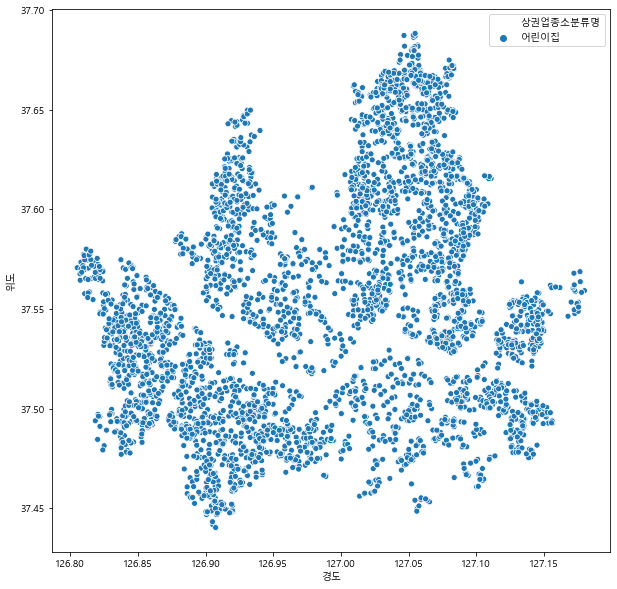

In [138]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_academy_selected[df_academy_selected["상권업종소분류명"]=="어린이집"],x="경도",y="위도",hue="상권업종소분류명")

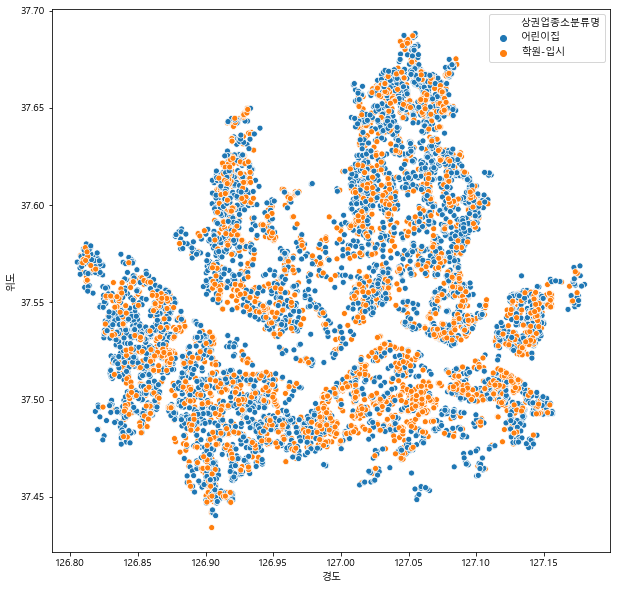

In [140]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_academy_selected[df_academy_selected["상권업종소분류명"].isin(["어린이집","학원-입시"])],x="경도",y="위도",hue="상권업종소분류명")

## Folium 지도 활용

In [141]:
import folium

In [142]:
long=df_academy_selected["경도"].mean()
lat=df_academy_selected["위도"].mean()

In [149]:
df_m=df_academy_selected[df_academy_selected["상권업종소분류명"].isin(["어린이집","학원-입시"])]
df_s=df_m.sample(1000)
df_s.shape   

(1000, 16)

In [150]:
df_s.iloc[0]

상호명                  폴라리스이엠수학교습소
상권업종대분류명                   학문/교육
상권업종중분류명               학원-보습교습입시
상권업종소분류명                   학원-입시
시도명                        서울특별시
시군구명                         강남구
행정동명                        대치1동
법정동명                         대치동
대지구분명                         대지
지번본번지                       1014
지번주소        서울특별시 강남구 대치동 1014-3
도로명             서울특별시 강남구 도곡로78길
건물본번지                         22
도로명주소        서울특별시 강남구 도곡로78길 22
경도                       127.059
위도                       37.4966
Name: 212630, dtype: object

In [155]:
m=folium.Map(location=[lat,long],zoom_start=12)
folium.Marker([37.4966,127.059],popup='<i>해법수학</i>',tooltip="해법수학").add_to(m)
m

In [156]:
#html 실행해서 보면 한글 깨지는 문제 해결가능
m.save('index.html') 

In [157]:
df_s.index

Int64Index([212630,  34415, 332505, 490967, 339469, 345358, 297136, 340460,
            350353, 321816,
            ...
              3069, 319458, 324951,  53259, 502834, 258355, 101659, 336539,
            174823, 188102],
           dtype='int64', length=1000)

In [159]:
for i in df_s.index:
    tooltip= df_s.loc[i,"상호명"]+"-"+df_s.loc[i,"도로명주소"]
    lat=df_s.loc[i,"위도"]
    long=df_s.loc[i,"경도"]
    
    print(tooltip,lat,long)


폴라리스이엠수학교습소-서울특별시 강남구 도곡로78길 22 37.496626069128496 127.058832161876
애드류영어교습소-서울특별시 강남구 삼성로 155 37.49392822730611 127.06290321902
천사어린이집-서울특별시 강서구 강서로13길 28 37.5316551986945 126.84517448801701
이레어린이집-서울특별시 광진구 자양로3길 55 37.52946866487721 127.083932857331
새하늘어린이집-서울특별시 성북구 보문로19길 6 37.5825984962676 127.020455997375
수찬학원-서울특별시 강남구 삼성로 311 37.499636914250004 127.0601288994
꼬마숲어린이집-서울특별시 관악구 남현길 18 37.475790583478606 126.97715954180799
튼튼어린이집-서울특별시 영등포구 디지털로37길 5 37.48914191979279 126.89872716411001
명문연세학원-서울특별시 서대문구 가좌로 142 37.584696396303 126.924041515474
도담도담어린이집-서울특별시 강서구 강서로48길 25 37.55269607831129 126.83800288086901
메가유티-서울특별시 서초구 서초중앙로 125 37.4930026170105 127.013406047413
그리다수학학원-서울특별시 송파구 삼전로 89 37.5065432295465 127.089427264338
개념과유형수학교습소-서울특별시 강남구 광평로 63 37.4828503531838 127.079606386624
아이숲어린이집-서울특별시 관악구 은천로 93 37.4912141028924 126.943092538961
구립도선어린이집-서울특별시 성동구 왕십리로30길 17-1 37.566094015507105 127.030599415699
관악보습학원-서울특별시 강남구 도곡로77길 7 37.4987937053684 127.058341270299
키즈클럽어학학원-

대학동해법수학교습소-서울특별시 관악구 신림로3가길 65 37.46870502997471 126.940990313488
폴스타학원-서울특별시 강서구 등촌로 211 37.5485247994991 126.863043677658
아이서밋어린이집-서울특별시 강동구 성내로3길 49 37.5320143635545 127.123739978539
종로구청어린이집-서울특별시 종로구 삼봉로 33 37.5731899694038 126.978794866218
팝잉글리쉬-서울특별시 서초구 잠원로8길 25 37.514395576229 127.011484290138
에듀포스트수학과학보-서울특별시 강동구 고덕로 256 37.554635763154 127.154067510642
미래학원-서울특별시 양천구 지양로7길 12 37.5215045252516 126.832751309755
하이청람보습학원-서울특별시 광진구 용마산로 96 37.5623025669757 127.087368130852
솔샘어린이집-서울특별시 양천구 목동동로 10 37.511957240747705 126.858949722472
뉴이스트수학전문학원-서울특별시 은평구 연서로 86 37.606838207745795 126.915556853778
명주어린이집-서울특별시 노원구 섬밭로 139 37.629123530756395 127.067711273272
행복나라어린이집-서울특별시 관악구 청룡8길 78 37.4801359193181 126.941609155483
대명수학학원-서울특별시 양천구 목동동로 423 37.536890208572295 126.883587355819
칸트수학교습소-서울특별시 광진구 아차산로 508 37.5417272700536 127.098538863807
찬솔나라학원-서울특별시 강남구 삼성로63길 25 37.499386450293 127.058096327075
한탑학원-서울특별시 강서구 강서로 316 37.5537399860137 126.836956778206
에덴어린이집-서울특별시 강동구 천중로53길 19 3

우일몬테소리어린이집-서울특별시 강서구 곰달래로49길 89 37.5351085359598 126.855598654144
한스영어-서울특별시 서초구 신반포로 22 37.5011603163542 126.98716194282301
푸른마을어린이집-서울특별시 양천구 신정로7길 70 37.5130810162132 126.836524775618
꿈동이어린이집-서울특별시 성북구 길음로13길 22 37.610258016174896 127.01799798043999
오르비수학-서울특별시 강남구 남부순환로 2931 37.4937679096624 127.060869662581
수학발전소-서울특별시 양천구 목동서로 77 37.535953916100794 126.877966511571
노원E해법수학교습소-서울특별시 노원구 동일로207길 186 37.6379448459453 127.05978302149799
뉴멘토학원-서울특별시 송파구 동남로20길 22 37.4956171646718 127.13427566325599
유필아카데미-서울특별시 중랑구 면목로58길 6 37.5845238121195 127.088716020084
재능어린이집-서울특별시 관악구 서원4길 18 37.477507788182294 126.931922977343
미키미니어린이집-서울특별시 노원구 초안산로1길 18 37.6291572309639 127.05158947189301
M플러스학원-서울특별시 노원구 월계로45길 37 37.626975748431896 127.050348364725
두뇌학습기술-서울특별시 서초구 고무래로8길 7 37.5021678585012 127.010356197976
청명수학교습소-서울특별시 강남구 도곡로 458 37.4984136675479 127.06040434660801
큐수학보습학원-서울특별시 강남구 도곡로 510 37.4990133147849 127.06216110792
강남수학학원-서울특별시 강동구 고덕로 240 37.5538002011224 127.15189261914101
스터디오

고우리어린이집-서울특별시 강동구 고덕로38길 56 37.5520739809031 127.142439400586
한양학원-서울특별시 서대문구 응암로 28 37.576104053197 126.90969695678801
닥터엠수학교습소-서울특별시 광진구 아차산로 552 37.5437721117555 127.104387374798
예일플러스학원-서울특별시 성북구 종암로5길 21 37.5942479422079 127.03454868883499
구립도담어린이집-서울특별시 관악구 청림3길 37 37.489709765452794 126.958356855548
SK건설행복날개어린이집-서울특별시 종로구 인사동7길 32 37.5730573406451 126.98430979763201
원리탐험수학교습소-서울특별시 강남구 도곡로 190 37.4918534555855 127.040165399235
아기우성어린이집-서울특별시 강남구 개포로110길 15 37.492515002095 127.076819000087
아소비공부방-서울특별시 도봉구 시루봉로 107 37.6613884450605 127.026301369518
보라매어린이집-서울특별시 동작구 여의대방로22길 44 37.49753230286571 126.922353051551
네오매쓰수학학원-서울특별시 광진구 자양로 214 37.546060337835996 127.08668348794399
정상도전학원-서울특별시 노원구 한글비석로 273 37.652165587575396 127.07720336204201
한빛어린이집-서울특별시 도봉구 도봉로110아길 55 37.6437968711145 127.037964376703
코코어린이집-서울특별시 강남구 논현로158길 19 37.5222165029341 127.029934304138
쇼팽어린이집-서울특별시 성동구 성덕정3길 9 37.5397855882959 127.047472210004
더강한학원-서울특별시 강동구 풍성로 247 37.5282174286485 127.13919395589599


In [161]:
m=folium.Map(location=[lat,long],zoom_start=12)

for i in df_s.index[:50]:
    tooltip= df_s.loc[i,"상호명"]+"-"+df_s.loc[i,"도로명주소"]
    lat=df_s.loc[i,"위도"]
    long=df_s.loc[i,"경도"]
    
    folium.Marker([lat,long],tooltip=tooltip).add_to(m)
m



In [164]:
m=folium.Map(location=[lat,long],zoom_start=12,tiles="Stamen Toner")

for i in df_s.index[:50]:
    tooltip= df_s.loc[i,"상호명"]+"-"+df_s.loc[i,"도로명주소"]
    lat=df_s.loc[i,"위도"]
    long=df_s.loc[i,"경도"]
    
    folium.CircleMarker([lat,long],tooltip=tooltip,radius=3).add_to(m)
m
